In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier


In [3]:
#import dataframe and visualize

path = 'normalized.pickle'
df = pd.read_pickle(os.path.join(r'C:\Users\Teresa\Desktop\TESE\Textural Analysis', path))

df

,Area,Image,Mean Green,Mean Intensity,Mean Red,Normalized Mean Green,Normalized Mean Red,Normalized Total Green,Normalized Total Red,Nucleus Patch,...,Equivalent Diameter,Major Axis Length,Minor Axis Length,Max Intensity,Min Intensity,Orientation,Perimeter,Solidity,Entropy,Circularity
0,4155,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,12.619976,125.657280,46.411793,0.262386,0.964963,0.262386,0.964963,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,72.734519,93.715394,56.642633,255,44,0.884948,248.350288,0.983199,5.579251,0.846548
3,4760,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,29.452311,120.828992,37.138025,0.621369,0.783518,0.621369,0.783518,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,77.849985,93.066080,65.323570,255,40,1.412099,258.894444,0.992287,6.150013,0.892424
4,5014,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,6.779418,114.041284,86.455325,0.078175,0.996940,0.078175,0.996940,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,79.900082,88.914160,72.074866,255,46,-1.500195,261.722871,0.990518,5.924569,0.919837
6,5503,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,10.632564,106.558968,73.093949,0.143949,0.989585,0.143949,0.989585,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,83.705658,89.324967,78.566344,255,39,-0.744969,271.764502,0.993142,5.826534,0.936319
7,5800,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,7.822759,116.757931,120.578621,0.064741,0.997902,0.064741,0.997902,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,85.934797,88.987739,83.083881,255,48,-1.071380,279.764502,0.992131,5.580421,0.931221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,5145,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,77.881633,152.714480,4.357629,0.998438,0.055865,0.998438,0.055865,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,80.937120,91.817259,71.901276,255,46,-1.451276,273.764502,0.985632,5.352308,0.862663
8614,4802,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,52.264681,136.686381,2.954602,0.998406,0.056441,0.998406,0.056441,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,78.192687,84.966272,71.992936,255,57,0.596904,258.107648,0.986239,5.435626,0.905796
8615,3566,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,17.987942,127.823331,39.335109,0.415878,0.909420,0.415878,0.909420,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,67.382284,77.833736,58.528837,255,52,-1.448471,228.409163,0.978864,5.656561,0.858943
8617,4908,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,51.481866,152.560921,7.560106,0.989389,0.145292,0.989389,0.145292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,79.050994,79.792635,78.405947,255,59,-1.557158,261.622366,0.985542,6.055117,0.901083


In [24]:
#data included in dataframe
columns = list(df.columns)

#select features of interest
features = ['Area', 'Mean Intensity', 'Mean', 'Std', 'Variance', 'Skewness', 'Kurtosis', 'Invariant Uniformity', 
            'GLCM Invariant Entropy', 'Invariant Correlation', 'Invariant Dissimilarity','Invariant Contrast', 
            'Invariant Homogeneity', 'Invariant Energy', 'BB Area','Centroid Divergence','Eccentricity', 
            'Equivalent Diameter', 'Major Axis Length', 'Minor Axis Length', 'Max Intensity', 'Min Intensity', 
            'Perimeter', 'Solidity', 'Entropy', 'Circularity','norm_area', 'norm_intensity']

In [31]:
#TESTING FOR ANOVA F-score

# Separating out the features
feat_col = df.loc[:, features]
# Separating out the target
target_col = df.loc[:,['Automatic Label']]


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(feat_col, target_col)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feat_col.columns)

#concat two dataframes for better visualization 
featureScores_F = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_F.columns = ['Features','Score']  #naming the dataframe columns
featureScores_F['P-Values'] = fit.pvalues_

print("F-SCORE BESTKSELECT")
featureScores_F.nlargest(10,'Score')  #print 10 best features


F-SCORE BESTKSELECT


C:\Users\Teresa\Anaconda2\envs\p36workshop\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Teresa\Anaconda2\envs\p36workshop\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20] are constant.
  UserWarning)
C:\Users\Teresa\Anaconda2\envs\p36workshop\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Features,Score,P-Values
27,norm_intensity,4240.525946,0.000000e+00
8,GLCM Invariant Entropy,1647.138163,3.434367e-296
9,Invariant Correlation,1066.482229,8.723325e-205
24,Entropy,1036.070994,1.098489e-199
19,Minor Axis Length,1027.441098,3.120739e-198
17,Equivalent Diameter,972.516427,6.452891e-189
0,Area,953.214957,1.289394e-185
26,norm_area,929.523542,1.517754e-181
14,BB Area,775.484978,1.545354e-154
22,Perimeter,679.935460,2.709393e-137


In [26]:
#TESTING FOR MUTUAL INFORMATION


# Separating out the features
feat_col = df.loc[:, features]
# Separating out the target
target_col = df.loc[:,['Automatic Label']]


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = mutual_info_classif)
fit = bestfeatures.fit(feat_col, target_col)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feat_col.columns)

#concat two dataframes for better visualization 
featureScores_MI = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_MI.columns = ['Features','Score']  #naming the dataframe columns


print("MUTUAL INFO BESTKSELECT")
featureScores_MI.nlargest(10,'Score')  #print 10 best features

C:\Users\Teresa\Anaconda2\envs\p36workshop\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MUTUAL INFO BESTKSELECT
                  Features     Score
27          norm_intensity  0.371066
8   GLCM Invariant Entropy  0.191289
9    Invariant Correlation  0.174498
24                 Entropy  0.145665
0                     Area  0.136384
17     Equivalent Diameter  0.133071
19       Minor Axis Length  0.130512
26               norm_area  0.124955
14                 BB Area  0.110020
6                 Kurtosis  0.107603


C:\Users\Teresa\Anaconda2\envs\p36workshop\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Teresa\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


[0.04387049 0.0365313  0.03607981 0.01673042 0.03164386 0.03097446
 0.03329096 0.01379451 0.06733961 0.0485051  0.02262702 0.02100963
 0.01259989 0.01529489 0.0374974  0.01379145 0.01667688 0.02231906
 0.01825704 0.02346221 0.         0.01497847 0.04047595 0.01547259
 0.04045877 0.01962776 0.05126442 0.25542607]


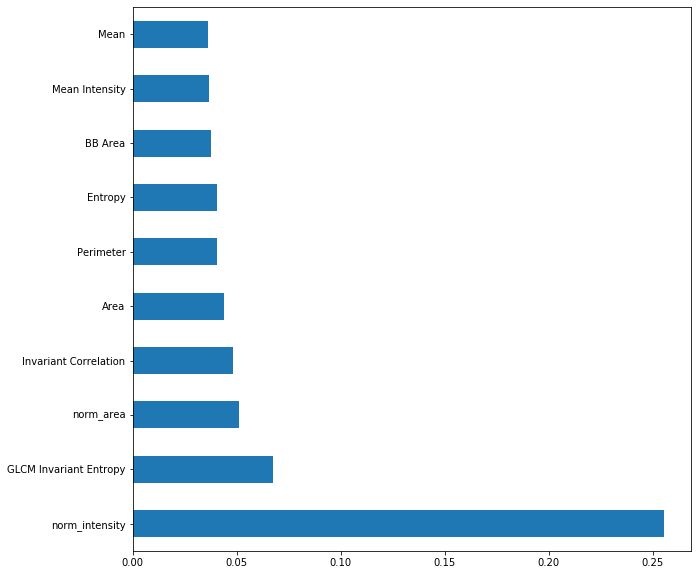

,0
norm_intensity,0.255426
GLCM Invariant Entropy,0.067340
norm_area,0.051264
Invariant Correlation,0.048505
Area,0.043870
Perimeter,0.040476
Entropy,0.040459
BB Area,0.037497
Mean Intensity,0.036531
Mean,0.036080


In [39]:
#Feature Importance

# Separating out the features
feat_col = df.loc[:, features]
# Separating out the target
target_col = df.loc[:,['Automatic Label']]


#apply ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(feat_col,target_col)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


#plot graph of feature importances for better visualization
plt.rcParams['figure.figsize'] = (10,10)
plt.figure()

feat_importances = pd.Series(model.feature_importances_, index=feat_col.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.show()


df_etc = pd.DataFrame(feat_importances.nlargest(10))
df_etc

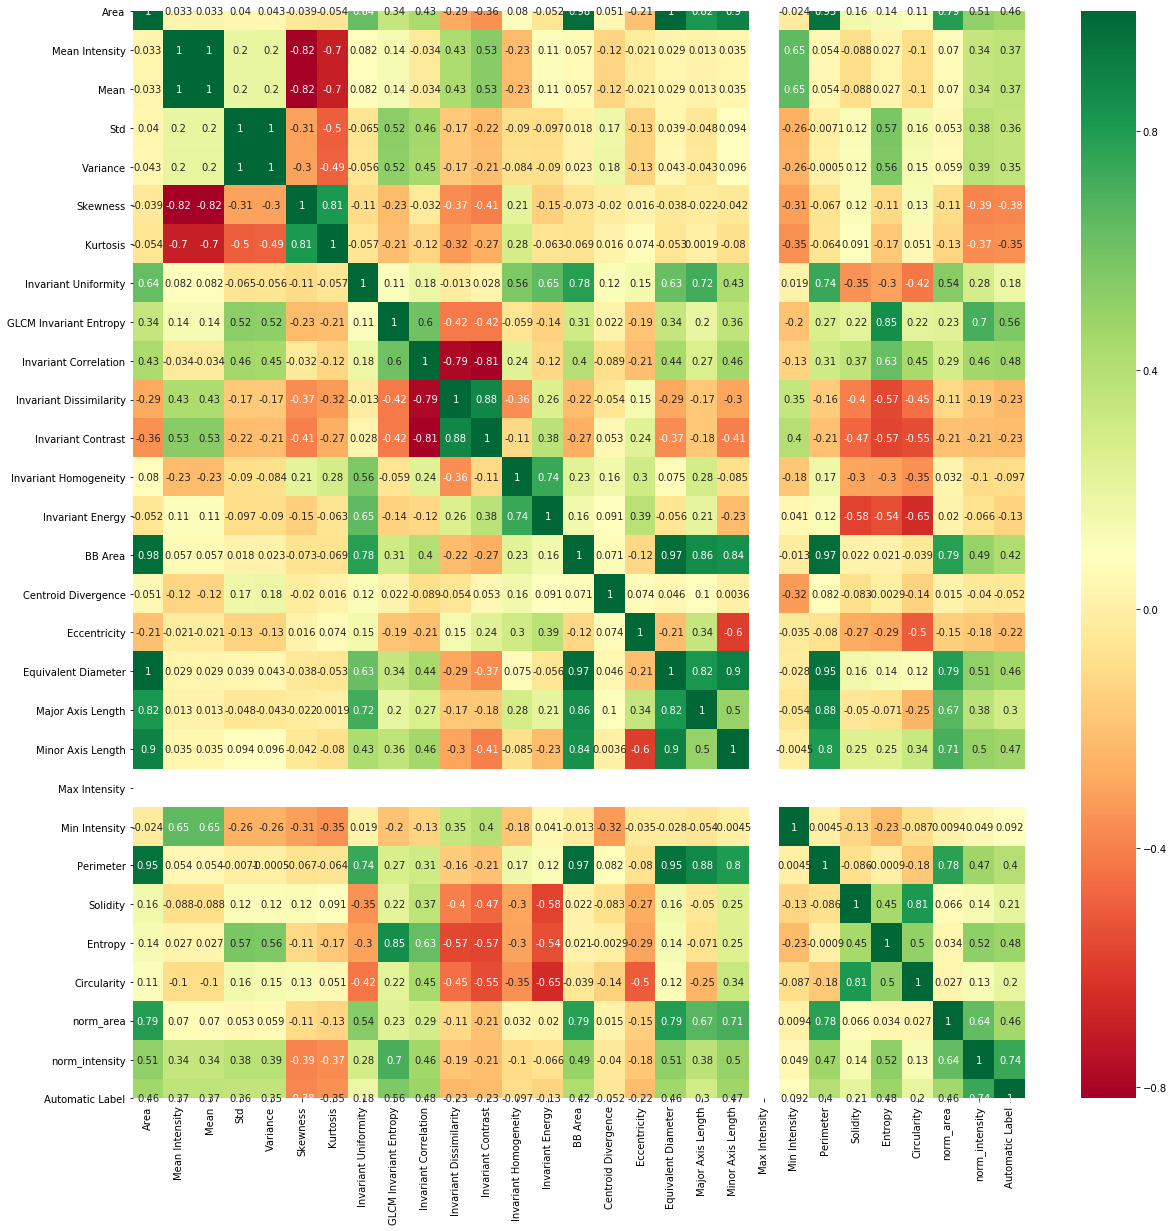

In [41]:
#CORRELATION

# Separating out the features
feat_col = df.loc[:, features]
# Separating out the target
target_col = df.loc[:,['Automatic Label']]

data = pd.concat([feat_col,target_col],axis=1)

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
